In [1]:
import posydon
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
os.environ['MSG_DIR'] = '/home/kasdaglie/blue/kasdaglie/msg-1.2'
import matplotlib.patches as mpatches
from population_spectra import population_spectra
#from generate_cmds import population_cmd
#from spectral_tools import population_data
%matplotlib inline
plt.rcParams.update({'font.size': 16})
import astropy.constants as con
import astropy.units as unt
kpc = 3.08e19*unt.m


In [4]:
colums = {'binary_number':[],'S1_mass':[],'S2_mass':[],'S1_R':[],'S2_R':[],'S1_L':[],'S2_L':[],'Z/Zo':[]}
df = pd.DataFrame(colums)
print(df)

Empty DataFrame
Columns: [binary_number, S1_mass, S2_mass, S1_R, S2_R, S1_L, S2_L, Z/Zo]
Index: []


In [2]:
from spectral_tools import load_posydon_population
print(load_posydon_population("/home/kasdaglie/blue/kasdaglie/paper_results/bpass_5/population_bpass_5.h5"))

                       state               S1_state   S1_mass  S1_log_R  \
0      initially_single_star  H-rich_Core_H_burning  1.612031  0.154240   
1      initially_single_star  H-rich_Core_H_burning  1.169704  0.050826   
2            low_mass_binary  H-rich_Core_H_burning  3.469515  0.303899   
3            low_mass_binary  H-rich_Core_H_burning  1.577487  0.152285   
4      initially_single_star  H-rich_Core_H_burning  0.857490 -0.122331   
...                      ...                    ...       ...       ...   
99548        low_mass_binary  H-rich_Core_H_burning  2.936586  0.264687   
99549  initially_single_star  H-rich_Core_H_burning  0.984655 -0.058282   
99550        low_mass_binary  H-rich_Core_H_burning  1.505753  0.148586   
99551  initially_single_star  H-rich_Core_H_burning  4.673815  0.375996   
99552  initially_single_star  H-rich_Core_H_burning  0.878218 -0.112086   

       S1_log_L               S2_state   S2_mass  S2_log_R  S2_log_L  Z/Zo  \
0      0.871855      

In [2]:
file = "/home/kasda/blue/kasdaglieglie/POSYDON_TRIAL/population_bpass.h5"
output_file = "spectral_data.h5"
pop_kwargs = dict(
    metallicity = 1.0,
    scaling_factor = 1*kpc,
    save_data = True,
    population_file = file,
    output_file = "pop_data.h5"
)
pop = population_spectra(**pop_kwargs)

main_grid sg-C3K-coarse.h5
secondary_grid sg-BSTAR2006-medium.h5
stripped_grid sg-Gotberg18.h5
bstar_grid sg-BSTAR2006-medium.h5
ostar_grid sg-OSTAR2002-medium.h5
lam_min 3000.0
lam_max 7000.0
lam_res 2000
cache_limit 256
filters ['U', 'B', 'V']


In [4]:
st = datetime.datetime.now()
spectra , lam_c =  pop.create_spectrum_population()
et = datetime.datetime.now()
elapsed_time = et - st 
print('Execution time: ', elapsed_time, 'seconds')


Secondary
{'Teff': <Quantity 15609.28670906>, 'log(g)': <Quantity 4.2766961>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 18076.40295408>, 'log(g)': <Quantity 4.18357057>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 17582.35731377>, 'log(g)': <Quantity 4.20183796>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 15008.00664386>, 'log(g)': <Quantity 4.29144535>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 15053.79457518>, 'log(g)': <Quantity 4.29035517>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 15722.33847456>, 'log(g)': <Quantity 4.27381688>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 21069.28129163>, 'log(g)': <Quantity 4.07098534>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 15651.77218099>, 'log(g)': <Quantity 4.2756251>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 17095.48691445>, 'log(g)': <Quantity 4.2364866>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 19003.37299

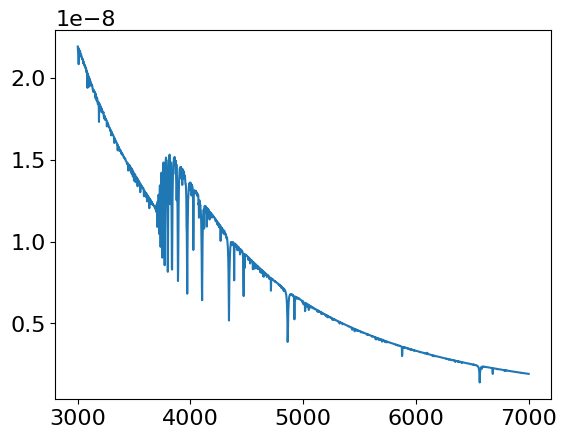

In [5]:
plt.plot(lam_c,spectra)

In [5]:
x = {'Teff':20000 ,'log(g)': 4.1,'[Fe/H]': 0,'Z/Zo':1}
pop.grids.photogrid_flux('secondary_grid',10e-9,**x)

{'U': 1644290389.957219, 'B': 688035373.8568047, 'V': 575954465.0107982}

In [6]:
cmd = population_cmd(file,**pop_kwargs)

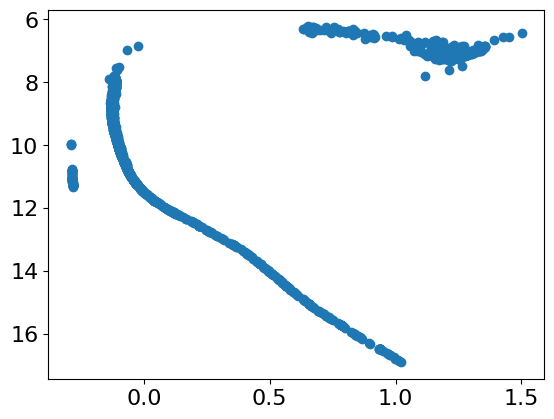

In [7]:
B_V,V,L = cmd.population_mag(3000)
plt.gca().invert_yaxis()
plt.scatter(B_V,V)

In [3]:
spectrum2,lam_c = pop.create_population_spectrum()


Loading the population took 0:00:00.702932 s
initially_single_star [5.34592969e-15 5.32254906e-15 6.55385657e-15 ... 7.98973040e-15
 7.95727505e-15 7.95095417e-15]
disrupted
merged
detached
initially_single_star
low_mass_binary
contact
RLO1
RLO2
low_mass_binary [1.13985572e-15 1.06009250e-15 1.81309836e-15 ... 3.59617154e-15
 3.57237138e-15 3.57198389e-15]
disrupted
merged
detached
initially_single_star
low_mass_binary
contact
RLO1
RLO2
low_mass_binary [2.43373781e-13 2.35592207e-13 2.44756144e-13 ... 6.30398817e-14
 6.29750649e-14 6.29011140e-14]
disrupted
merged
detached
initially_single_star
low_mass_binary
contact
RLO1
RLO2
initially_single_star [4.68363467e-14 4.52604011e-14 4.84020147e-14 ... 2.68831750e-14
 2.68522663e-14 2.68131426e-14]
disrupted
merged
detached
initially_single_star
low_mass_binary
contact
RLO1
RLO2
initially_single_star [3.50661427e-13 3.39435481e-13 3.51884050e-13 ... 7.76593611e-14
 7.75786586e-14 7.74885269e-14]
disrupted
merged
detached
initially_single_s

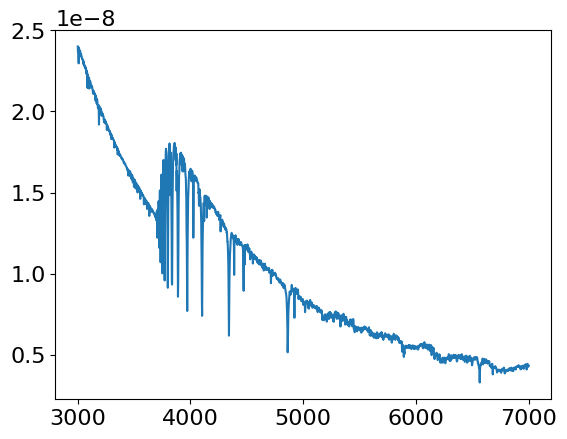

In [4]:
total_spectrum = 0 
for i in spectrum2:
    total_spectrum += spectrum2[i]
#plt.plot(lam_c,total_spectrum)
plt.plot(lam_c,total_spectrum)

(0.0, 40000.0)

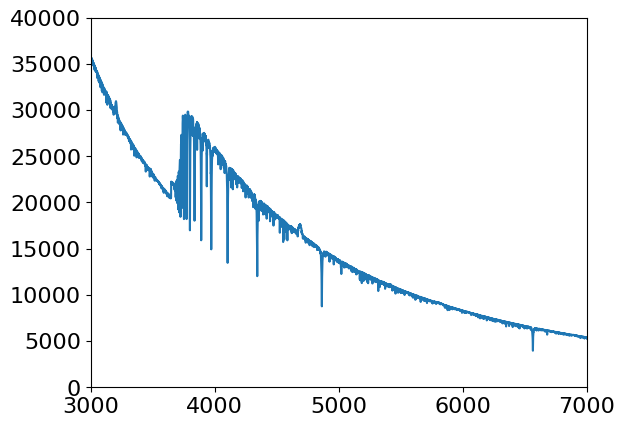

In [17]:
data = np.loadtxt("/home/kasdaglie/blue/kasdaglie/bpass/spectra-bin-imf135_300.a+00.z002.dat")
sed_5 = data[:,8]
lam = data[:,0]
plt.plot(lam,sed_5)
plt.xlim(3000,7000)
plt.ylim(0,40000)

In [1]:
from spectral_grids import spectral_grids
spec = spectral_grids()
print(spec.spectral_grids)
spec.wavelength_range_check()

main_grid sg-C3K-coarse.h5
secondary_grid sg-BSTAR2006-medium.h5
stripped_grid sg-Gotberg18.h5
bstar_grid sg-BSTAR2006-medium.h5
ostar_grid sg-OSTAR2002-medium.h5
lam_min 3000.0
lam_max 7000.0
lam_res 2000
cache_limit 256
filters ['U', 'B', 'V']
{'main_grid': <pymsg.SpecGrid object at 0x1503afa65c60>, 'secondary_grid': <pymsg.SpecGrid object at 0x1503afa65ae0>, 'stripped_grid': <pymsg.SpecGrid object at 0x1503afa65870>, 'bstar_grid': <pymsg.SpecGrid object at 0x1503afa65600>, 'ostar_grid': <pymsg.SpecGrid object at 0x1503aa214c40>}
60.9851150264


60.9851150264